## Homework №1

### №1. Loss X are exponentially distributed with an average value of 100 million rubles. What is 95% level of VaR?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import statistics

# VaR_95 = mean + std*q_95

In [30]:
# generate random numbers from N(0,1)
# data_normal = ss.norm.rvs(size = 10000,loc = 0,scale = 1)

#в экспоненчиальном распределении вот такие параметры:
#"Loc" = то что сдвигает выборку (регулирует кривая правее/левее)
#"Scale" = mean (регулирует уровень крутости/пологости)
#"Size" = number of random variates

#моделируем выборку
sample = ss.expon.rvs(size = 100000, scale = 100)
returns = pd.Series(sample)

#смотрим справа хвост (потому что чем правее тем значения у кривой меньше), поэтому 0.95 квантиль, там именно потери
VAR = -returns.quantile(0.95, interpolation = 'higher')
-VAR

298.35668295077545

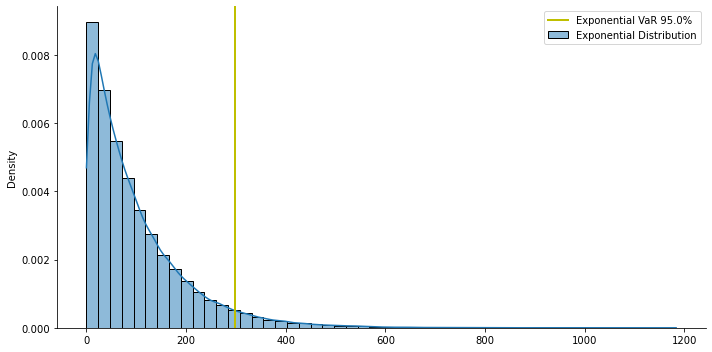

In [37]:
level = 0.95

sns.displot(
    returns,
    kind="hist",
    stat="density",
    bins=50,
    kde=True,
    aspect=2,
    label="Exponential Distribution"
)

x = np.linspace(*plt.xlim(), 1000)

plt.axvline(x=-VAR, linewidth=2, color="y", label=f"Exponential VaR {level*100}%")
plt.legend()

### №2. The asset returns are normally distributed. The expected return is non-negative, and 95% VaR = 100. ES at the same confidence level can be..?

In [7]:
# ES_95 = m + std/(alpha - 1)*Ф(q95)
# 100 = m + std*q95

# ES - 100 = m - m + std*(Ф(q95)/(alpha - 1) - q95)
# ES = 100 - std*(0.103/0.05 + 1.644)

ss.norm.ppf(0.95)
ss.norm.pdf(ss.norm.ppf(0.95))

0.103/0.05 + 1.644

# ES = 100 - 3.7*std

3.7039999999999997

### №3. The analyst built a model to estimate VaR for the monthly financial results of the bank's trading division. He expects that losses greater than VaR occur once per 2 years on average. Over the last 10 years actual losses hit estimated VaR 9 times. Apply 1-sided binomial test and determine the traffic-light zone that the model falls into.

In [ ]:
N = 12*10 #hits.size
n = 9 #hits.sum

#убытки превышают предсказание в 1/24 случаях
#если бы Var_95 то вместо 1/24 надо 0.05 (в 5% случаев ожидаем пробитие варом предсказаний)
p_val = ss.binom_test(n, N, 1/24, alternative = "greater")

#q теорерическое = 1/24
#q наблюдаемое = 9/120

#H0: q_теор = q_наблюд
#p-value - веротятность ошибиться при отвержении H0

def zone(p):
  if p > 0.05:
    return "green"
  elif p > 0.0001:
    return "yellow"
  else:
    return "red"

print(round(p_val*100, 2),'%  ' , zone(p_val))

#если например пробоев в реальности было 20 из 120 то это пиздец много, p-value = 0 (0% ошибиться, то есть q_теор НЕ РАВНО q_наблюд)

#бтв неважно насколько огромный p-value например 6% или 9%, модель хорошая anyway
#но если p-value 100% то модель слишком жесткая

### №4. You've got generation of daily stock values and 1-day VaR estimates. Determine how many observations these 2 series can provide for the back-test of 1-day VaR.

Backtesting is the process of comparing losses predicted by a value at risk (VaR) model to those actually experienced over the testing period. It is done to ensure that VaR models are reasonably accurate. 

In [3]:
np.random.seed(14)
index_quotes = pd.Series(1700 + np.cumsum(np.random.randint(-10, 10, size = 88)), index = pd.period_range(end = '2021-09-01', periods = 88, freq = 'B'))
assert index_quotes.iloc[0] == 1701, 'Something is wrong! Contact the teacher'

np.random.seed(88)
VaRs = pd.Series(50 + np.random.randint(-10, 10, size = 70), index = pd.period_range(end = '2021-09-09', periods = 70, freq = 'B'))
assert VaRs.iloc[0] == 40, 'Something is wrong! Contact the teacher'

returns = index_quotes.pct_change().dropna()
a = pd.concat([returns, VaRs], axis = 1)
a.dropna(inplace = True)
a

,0,1
2021-06-04,-0.003619,40.0
2021-06-07,0.001816,55.0
2021-06-08,0.001813,57.0
2021-06-09,0.004222,50.0
2021-06-10,-0.006006,45.0
...,...,...
2021-08-26,0.001198,58.0
2021-08-27,0.000598,57.0
2021-08-30,-0.005383,47.0
2021-08-31,0.001804,44.0


### №5.  You've got generation of daily stock values and 1-day VaR estimates (denominated in basis points, 0.01%). Find out how many times actual losses hit VaR estimates.

0    6
dtype: int64

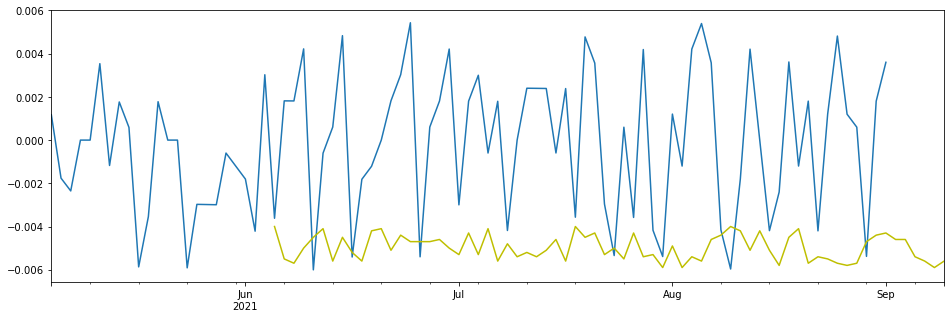

In [107]:
np.random.seed(14)
index_quotes = pd.Series(1700 + np.cumsum(np.random.randint(-10, 10, size = 88)), index = pd.period_range(end = '2021-09-01', periods = 88, freq = 'B'))
assert index_quotes.iloc[0] == 1701, 'Something is wrong! Contact the teacher'

np.random.seed(88)
VaRs = pd.Series(50 + np.random.randint(-10, 10, size = 70), index = pd.period_range(end = '2021-09-09', periods = 70, freq = 'B'))
assert VaRs.iloc[0] == 40, 'Something is wrong! Contact the teacher'



VaRs_normal = VaRs/10000
returns = index_quotes.pct_change().dropna()


#график, чтобы чисто визуально чекнуть
plt.figure(figsize=(16,5))
returns.plot()
(-VaRs_normal).plot(color='y')


#подсчет, если вдруг визуально не получилось
VaRs_df = pd.DataFrame(VaRs/10000)

b = pd.concat([returns, -VaRs_df], axis = 1) #соединили VaRs и returns
new = b.iloc[:,[0]] < b.iloc[:,[1]] #пофильтруем значения где VaR > returns

new = new.replace(True, 1)
new = new.replace(False, 0)

new.loc[:,[0]].sum()

# Летучка №1

In [24]:
# ЗАДАНИЕ №2.

#mean=1%
#standard deviation=5%
#degrees of freedom=3
sample = ss.t.rvs(df = 3, loc = 0.01, scale = 0.05, size = 100000)
returns = pd.Series(sample)
VaR_99 = -returns.quantile(0.99, interpolation = 'higher')
-VaR_99

0.23790896007825593